In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Initialisation of functions

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from  numpy import cos,linspace,dot, real, array, pi, trace
from numpy.linalg import multi_dot
from scipy.linalg import expm

sz=1/2*array([[1,0],[0,-1]])
sx=1/2*array([[0,1],[1,0]])
sy=1/2*array([[0,1j],[-1j,0]])

colors = mpl.cm.Dark2.colors
from cycler import cycler

mpl.style.use('seaborn')
mpl.rc("figure", facecolor="white")
mpl.rcParams['axes.prop_cycle'] = cycler(color=colors)

mpl.rcParams['font.size'] = 14
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.family'] = "Verdana"
mpl.rcParams['font.style'] = "italic"

In [11]:
def U(ax, az):
    return expm(-1j*(ax*sx+az*sz))

def Ureal(n,wr):
    return expm(-1j*(-w0*sz+2*wr*(cos((n)*wmw*dt))*sx)*dt)
    
def FidelityU(wr,theta):
    Ur=U(0,0)
    T=theta/wr
    for k in range(int(T/dt)):
        Ur=dot(Ur,Ureal(k,wr))
    return abs((dot(Ur.conj().T,U(theta,0)))).trace()/2

## Computation of fidelity : RWA vs LabFram

In [19]:
        
w0=10*2*pi #Larmor frequency
wmw=10*2*pi #microwave frequency
dt=1/30/w0 # sampling

wr1=2*pi*linspace(0.1,10,100)
F1=[]
F2=[]
F3=[]
for wr in wr1:

    F1.append(1-FidelityU(wr,pi))
    F2.append(1-FidelityU(wr,pi/2))
    F3.append(1-FidelityU(wr,pi/4))

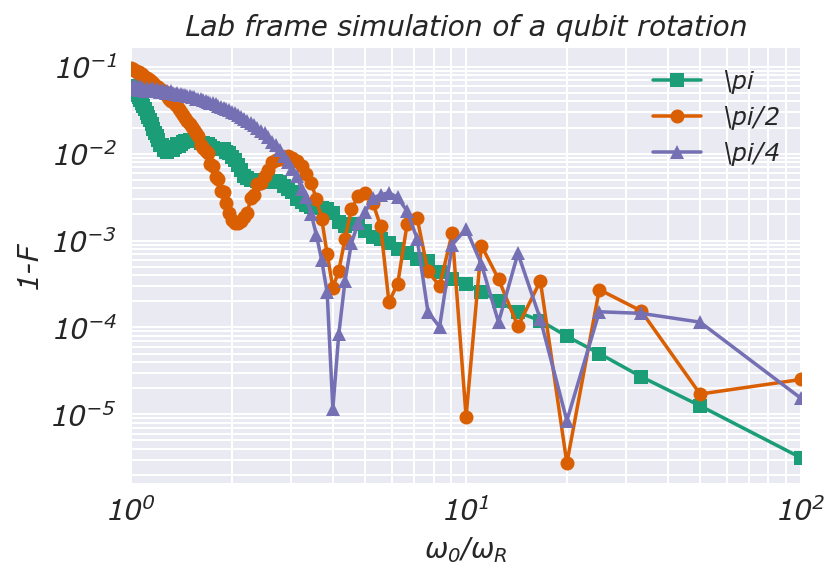

In [27]:
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
ax.loglog(w0/wr1,F1,'s-',label='\pi')
ax.loglog(w0/wr1,F2,'o-',label='\pi/2')
ax.loglog(w0/wr1,F3,'^-',label='\pi/4')
ax.grid(True,which="both",ls="-")
ax.set_title('Lab frame simulation of a qubit rotation')
ax.set_xlim([1,100])
ax.set_xlabel('$\omega_0/\omega_R$')
ax.set_ylabel('1-F')
ax.legend(fontsize=12)
#ax1.set_yticks([0,0.25,0.5,0.75,1])
#ax1.set_ylim([0,1.1])

## Rabi oscillations in LabFrame

In [24]:
Ur=U(0,0)
z=[]
        
w0=10*2*pi #Larmor frequency
wmw=10*2*pi #microwave frequency
dt=1/30/w0 # sampling
wr=0.1*wmw
T=4*pi/wr

for k in range(int(T/dt)):
    Ur=dot(Ur,Ureal(k,wr))
    z.append(trace(multi_dot([sz,Ur.conj().T,sz,Ur])))

Text(0, 0.5, '<Sz>')

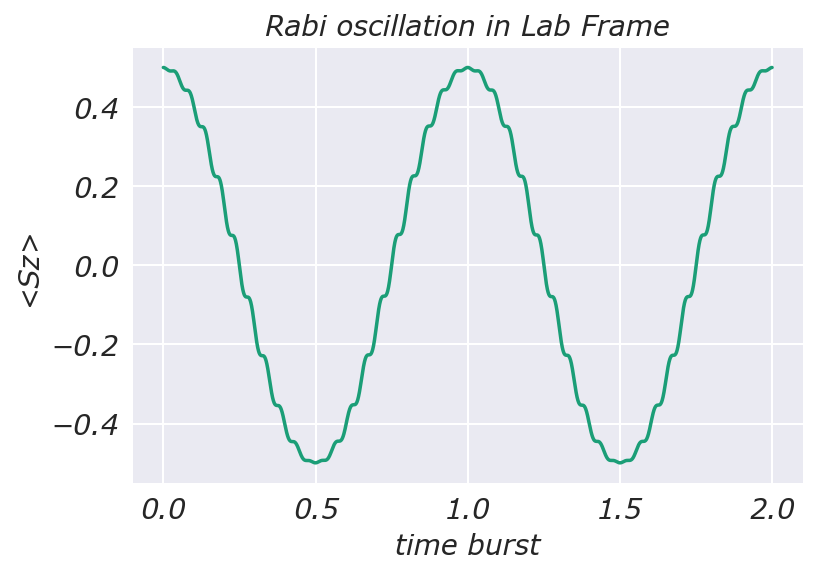

In [28]:
tburst=linspace(0,T,int(T/dt))
fig = plt.figure(figsize=(6, 4))
ax = plt.subplot(111)
ax.plot(tburst,real(z))
ax.set_title('Rabi oscillation in Lab Frame')
#ax.set_xlim([1,100])
ax.set_xlabel('time burst')
ax.set_ylabel('<Sz>')
#ax.legend(fontsize=12)